In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

In [4]:
class GaussianMixtureModel:
    def __init__(self, n_components, n_iters, tol):
        self.n_components = n_components
        self.n_iters = n_iters
        self.tol = tol

    def initialize(self, X):
        self.shape = X.shape
        self.n, self.m = self.shape

        self.phi = np.full(shape=self.n_components, fill_value=1 / self.n_components)
        self.weights = np.full(shape=self.shape, fill_value=1 / self.n_components)

        random_row = np.random.randint(low=0, high=self.n, size=self.n_components)
        self.mu = [X[row_index, :] for row_index in random_row]
        self.sigma = [np.cov(X.T) for _ in range(self.n_components)]

    def e_step(self, X):
        self.weights = self.predict_proba(X)
        self.phi = self.weights.mean(axis=0)

    def m_step(self, X):
        for i in range(self.n_components):
            weight = self.weights[:, [i]]
            total_weight = weight.sum()
            self.mu[i] = (X * weight).sum(axis=0) / total_weight
            self.sigma[i] = np.cov(X.T,
                                   aweights=(weight / total_weight).flatten(),
                                   bias=True)

    def fit(self, X):
        self.initialize(X)

        for iteration in range(self.n_iters):
            mu_old = self.mu.copy()
            self.e_step(X)
            self.m_step(X)

            if np.abs(np.linalg.norm(np.array(self.mu)) - np.linalg.norm(np.array(mu_old))) < self.tol:
                break

    def predict_proba(self, X):
        likelihood = np.zeros((self.n, self.n_components))
        for i in range(self.n_components):
            distribution = multivariate_normal(
                mean=self.mu[i],
                cov=self.sigma[i])
            likelihood[:, i] = distribution.pdf(X)

        numerator = likelihood * self.phi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        weights = numerator / denominator
        return weights

    def predict(self, X):
        weights = self.predict_proba(X)
        return np.argmax(weights, axis=1)

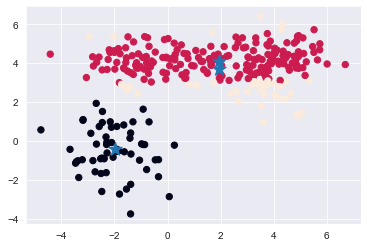

In [7]:
# Create synthetic data
np.random.seed(0)
n = 300
_mu = np.array([[0, 4], [-2, 0], [4, 4]])
_sigma = np.array([[[3, 0], [0, 0.5]], [[1,0],[0,2]], [[1,0],[0,1]]])
_p = np.array([0.4, 0.2, 0.4])
X = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*n))
                    for pi, mu, sigma in zip(_p, _mu, _sigma)])

# Fit and predict
gmm = GaussianMixtureModel(n_components=3, n_iters=10, tol=1e-3)
gmm.fit(X)
predicted_labels = gmm.predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, s=40)
plt.scatter(np.array(gmm.mu)[:, 0], np.array(gmm.mu)[:, 1], s=200, marker='*')
plt.show()

b) Changing the mean vectors and the covariance matrices for the mixture components.

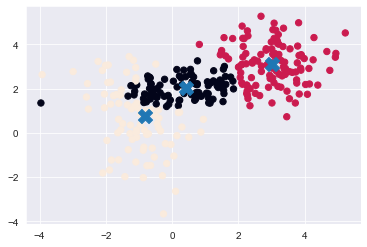

In [9]:
_mu_new = np.array([[0, 2], [-1, 0], [3, 3]])
_sigma_new = np.array([[[2, 0], [0, 0.3]], [[0.7,0],[0,1.5]], [[0.8,0],[0,0.8]]])

X_new = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*n))
                    for pi, mu, sigma in zip(_p, _mu_new, _sigma_new)])

gmm.fit(X_new)
predicted_labels_new = gmm.predict(X_new)

plt.scatter(X_new[:, 0], X_new[:, 1], c=predicted_labels_new, s=40)
plt.scatter(np.array(gmm.mu)[:, 0], np.array(gmm.mu)[:, 1], s=200, marker='X')
plt.show()

If you change the mean vectors and the covariance matrices, it will affect the initial state of the EM algorithm. The EM algorithm should still converge to the optimal parameters, but the path taken might be different.

c) Vary the size of the sample set and repeat the scenarios from 1 a) and 1 b).

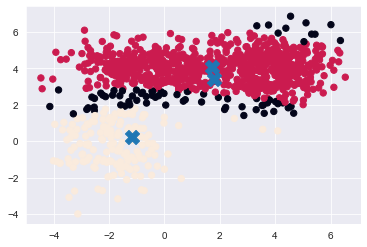

In [10]:
# Increase sample size
n_large = 1000
X_large = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*n_large))
                    for pi, mu, sigma in zip(_p, _mu, _sigma)])

gmm.fit(X_large)
predicted_labels_large = gmm.predict(X_large)

plt.scatter(X_large[:, 0], X_large[:, 1], c=predicted_labels_large, s=40)
plt.scatter(np.array(gmm.mu)[:, 0], np.array(gmm.mu)[:, 1], s=200, marker='X')
plt.show()

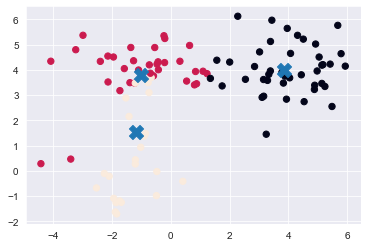

In [11]:
# Decrease sample size
n_small = 100
X_small = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*n_small))
                    for pi, mu, sigma in zip(_p, _mu, _sigma)])

gmm.fit(X_small)
predicted_labels_small = gmm.predict(X_small)

plt.scatter(X_small[:, 0], X_small[:, 1], c=predicted_labels_small, s=40)
plt.scatter(np.array(gmm.mu)[:, 0], np.array(gmm.mu)[:, 1], s=200, marker='X')
plt.show()

The size of the sample set will affect the stability and speed of the EM algorithm. With more data, the EM algorithm should theoretically become more accurate (as it has more information to work with), but it might also take longer to run.

d) Vary the number of mixture components using more or less then used to create the sample set.

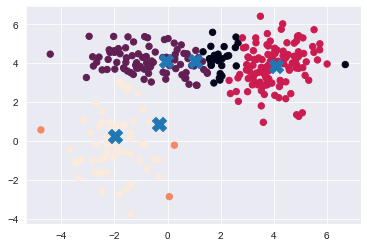

In [12]:
# More components
gmm_more = GaussianMixtureModel(n_components=5, n_iters=10, tol=1e-3)
gmm_more.fit(X)
predicted_labels_more = gmm_more.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=predicted_labels_more, s=40)
plt.scatter(np.array(gmm_more.mu)[:, 0], np.array(gmm_more.mu)[:, 1], s=200, marker='X')
plt.show()

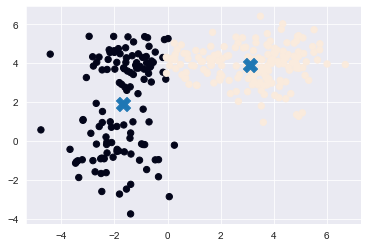

In [13]:
# Less components
gmm_less = GaussianMixtureModel(n_components=2, n_iters=10, tol=1e-3)
gmm_less.fit(X)
predicted_labels_less = gmm_less.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=predicted_labels_less, s=40)
plt.scatter(np.array(gmm_less.mu)[:, 0], np.array(gmm_less.mu)[:, 1], s=200, marker='X')
plt.show()

If you vary the number of mixture components, you are changing the complexity of the model. If you use more components than the real number, the model might overfit the data. If you use fewer components, it might underfit the data.

e) Increase the dimensionality of the distribution.

In [14]:
# Increase to 3D
_mu_3D = np.array([[0, 4, 2], [-2, 0, 1], [4, 4, 3]])
_sigma_3D = np.array([[[3, 0, 1], [0, 0.5, 0], [1, 0, 1]],
                      [[1, 0, 0], [0, 2, 0], [0, 0, 1]],
                      [[1, 0, 0], [0, 1, 0], [0, 0, 1]]])

X_3D = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*n))
                    for pi, mu, sigma in zip(_p, _mu_3D, _sigma_3D)])

gmm_3D = GaussianMixtureModel(n_components=3, n_iters=10, tol=1e-3)
gmm_3D.fit(X_3D)
predicted_labels_3D = gmm_3D.predict(X_3D)

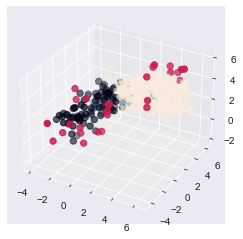

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3D[:, 0], X_3D[:, 1], X_3D[:, 2], c=predicted_labels_3D, s=40)
ax.scatter(np.array(gmm_3D.mu)[:, 0], np.array(gmm_3D.mu)[:, 1], np.array(gmm_3D.mu)[:, 2], s=200, marker='X')
plt.show()

As the dimensionality of the distribution increases, the EM algorithm will become more computationally intensive. This is because it needs to estimate more parameters (the mean and covariance matrix of each component). Also, as the dimensionality increases, the algorithm might require more data to accurately estimate these parameters (the curse of dimensionality).